In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [45]:
import numpy as np
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt
import os
import numpy as np 

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tqdm import tqdm
import shutil
import random
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.layers import  Dropout, Dense, Flatten, BatchNormalization,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import GridSearchCV

In [2]:
# dataset_path = os.listdir('/kaggle/input/dataset-4/data_2')
dataset_path = os.listdir('/kaggle/input/ocular-dataset/ocular_data')


In [3]:
print(dataset_path)

['age_related_macular_degeneration', 'other_diseases', 'glaucoma', 'normal', 'cataract']


In [4]:
print("Types of classes labels found: ",len(dataset_path))

Types of classes labels found:  5


In [5]:
class_labels=[]

for item in dataset_path:
    #get all the files names
    all_classes = os.listdir('/kaggle/input/ocular-dataset/ocular_data' + '/' +item)
#     print(len(all_classes))


    for room in all_classes:
        
        class_labels.append((item,str('dataset_path' + '/' +item) + '/' + room))
#         print(len(class_labels))

In [6]:
df=pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

                             Labels  \
0  age_related_macular_degeneration   
1  age_related_macular_degeneration   
2  age_related_macular_degeneration   
3  age_related_macular_degeneration   
4  age_related_macular_degeneration   

                                               image  
0  dataset_path/age_related_macular_degeneration/...  
1  dataset_path/age_related_macular_degeneration/...  
2  dataset_path/age_related_macular_degeneration/...  
3  dataset_path/age_related_macular_degeneration/...  
4  dataset_path/age_related_macular_degeneration/...  
        Labels                                      image
4996  cataract  dataset_path/cataract/cataract_0_7007.jpg
4997  cataract        dataset_path/cataract/2105_left.jpg
4998  cataract        dataset_path/cataract/2207_left.jpg
4999  cataract  dataset_path/cataract/cataract_0_5696.jpg
5000  cataract  dataset_path/cataract/cataract_0_1490.jpg


In [7]:
#let's check how many samples for each category are present

print('Total number of images in the dataset : ',len(df))

label_count = df['Labels'].value_counts()

print(label_count)


Total number of images in the dataset :  5001
normal                              1001
age_related_macular_degeneration    1000
other_diseases                      1000
glaucoma                            1000
cataract                            1000
Name: Labels, dtype: int64


In [8]:
import cv2

path='/kaggle/input/ocular-dataset/ocular_data/'

dataset_path=os.listdir('/kaggle/input/ocular-dataset/ocular_data')

im_size=224

images=[]
labels=[]


for i in dataset_path:
    data_path=path + str(i)
    filenames=[i for i in os.listdir(data_path)]
    
    for f in filenames:
        img= cv2.imread(data_path + '/' + f)
        img=cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [9]:



#This model takes inputs of shape (224, 224, 3), and the input data should range [0, 255]

images= np.array(images)

images=images.astype('float32')/255.0

images.shape

(5001, 224, 224, 3)

In [13]:
y=df['Labels'].values
print(y[5000:6000])

['cataract']


In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
y=df['Labels'].values
print(y[:5000])


y_labelencoder=LabelEncoder()
y=y_labelencoder.fit_transform(y)
print(y[:50])

['age_related_macular_degeneration' 'age_related_macular_degeneration'
 'age_related_macular_degeneration' ... 'cataract' 'cataract' 'cataract']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [15]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('my_ohe',OneHotEncoder(),[0])],remainder='passthrough')
Y=ct.fit_transform(y).toarray()
print(Y[:5])
print(Y[:1000])
print(Y[:2000])
print(Y[:3000])
print(Y[:4000])
print(Y[:5000])


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [16]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images,Y = shuffle(images, Y, random_state=1)

train_x,test_x,train_y,test_y= train_test_split(images,Y,test_size=0.05,random_state=415)

In [17]:

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(4750, 224, 224, 3)
(4750, 5)
(251, 224, 224, 3)
(251, 5)


In [18]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Input

In [19]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(weights="imagenet",include_top = False,input_shape=(im_size,im_size,3))

58889256/58889256 [==============================] - 0s 0us/step


In [20]:
for layer in vgg.layers:
    layer.trainable = False

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(vgg)
model.add(Flatten())
# model.add(Dropout(0.1))
model.add(Dense(5,activation="sigmoid"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 5)                 125445    
                                                                 
Total params: 14,840,133
Trainable params: 125,445
Non-trainable params: 14,714,688
_________________________________________________________________


In [23]:
model.compile(optimizer = Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=["accuracy"])

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg16.h5",monitor="val_loss",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="val_loss",patience=50,verbose=1, mode='auto')

In [30]:
model.evaluate(test_x,test_y)

8/8 [==============================] - 1s 67ms/step - loss: 1.7846 - accuracy: 0.2271


[1.7845948934555054, 0.22709164023399353]

In [31]:
 import shutil

# # Delete a directory and its contents
# shutil.rmtree('/ka')

In [135]:
m=keras.models.load_model("/kaggle/working/vgg16.h5")
acc=m.evaluate(train_x,train_y,verbose=1)[1]

print(f"Test accuracy of your model is = {acc*100} %")

149/149 [==============================] - 10s 65ms/step - loss: 1.1852 - accuracy: 0.5893
Test accuracy of your model is = 58.92631411552429 %


In [136]:
m.evaluate(test_x,test_y)

8/8 [==============================] - 1s 65ms/step - loss: 1.7175 - accuracy: 0.1952


[1.7175487279891968, 0.19521912932395935]

In [34]:
history = model.fit(train_x,train_y,batch_size=64,epochs=100,validation_data=(test_x,test_y),
                    verbose=1,callbacks=[checkpoint,earlystop])
filepath='vgg16.h5'
model.save(filepath)

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 1.3335 - accuracy: 0.4272
Epoch 1: val_loss improved from inf to 1.22222, saving model to vgg16.h5
75/75 [==============================] - 23s 214ms/step - loss: 1.3335 - accuracy: 0.4272 - val_loss: 1.2222 - val_accuracy: 0.4343
Epoch 2/100
74/75 [============================>.] - ETA: 0s - loss: 1.1289 - accuracy: 0.5332
Epoch 2: val_loss improved from 1.22222 to 1.09860, saving model to vgg16.h5
75/75 [==============================] - 10s 128ms/step - loss: 1.1286 - accuracy: 0.5333 - val_loss: 1.0986 - val_accuracy: 0.5857
Epoch 3/100
74/75 [============================>.] - ETA: 0s - loss: 1.0569 - accuracy: 0.5754
Epoch 3: val_loss improved from 1.09860 to 1.04488, saving model to vgg16.h5
75/75 [==============================] - 10s 129ms/step - loss: 1.0576 - accuracy: 0.5749 - val_loss: 1.0449 - val_accuracy: 0.5817
Epoch 4/100
74/75 [============================>.] - ETA: 0s - loss: 1.0155 - accuracy: 0.58

In [126]:
objects = ('age_related_macular_degeneration', 'other_diseases', 'glaucoma', 'normal', 'cataract')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4]


In [127]:
def emotion_analysis(emotions):
    objects = ('age_related_macular_degeneration', 'other_diseases', 'glaucoma', 'normal', 'cataract')
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [128]:
y_pred=model.predict(test_x)
#print(y_pred)
test_y.shape

8/8 [==============================] - 0s 63ms/step


(251, 5)

In [133]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the example image
img_path = '/kaggle/input/glucoma/43_left.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255  # Normalize

# If needed, convert to grayscale and expand dimensions
# ...
custom = model.predict(x)



1/1 [==============================] - 0s 23ms/step


In [134]:
# Assuming 'objects' is a list of class names
m = 0.0
a = custom[0]
for i in range(0, len(a)):
    if a[i] > m:
        m = a[i]
        ind = i

print('Expression Prediction:', objects[ind])


Expression Prediction: other_diseases


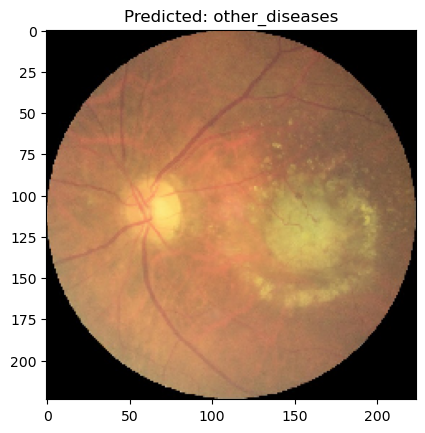

In [137]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f'Predicted: {objects[ind]}')
plt.show()
